# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Tommy Gunawan
- **Email:** tommygunawan966@gmail.com
- **ID Dicoding:** tommygu

## Menentukan Pertanyaan Bisnis

- Berapa banyak jumlah orang yang memilih status registered dibandingkan dengan yang casual?
- Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit disewa?
- Musim apa dengan penyewa sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.2
NumPy version: 1.26.4
Seaborn version: 0.13.1


## Data Wrangling

### Gathering Data

In [106]:
#Tabel File Day.csv dan shape data tersebut

days_df = pd.read_csv('sample_data/day.csv')
print(days_df.shape)
days_df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [107]:
#Tabel File Day.csv dan shape data tersebut

hours_df = pd.read_csv('sample_data/hour.csv')
print(hours_df.shape)
hours_df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [87]:
print("Jumlah baris DataFrame day:", days_df.shape[0])
print("Jumlah baris DataFrame hour:", hours_df.shape[0])

Jumlah baris DataFrame day: 731
Jumlah baris DataFrame hour: 17379


**Insight:**
- Proyek ini menggunakan 2 dataframe yaitu day dan hour. kedua dataframe tersebut memiliki struktur tabel yang sama tetapi beda pada jumlah datanya.

### Assessing Data

Data Information

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [89]:
#cek struktur dan type data hour

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [90]:
#cek struktur dan type data day

days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [91]:
#cek data duplikat pada dile day

print("Jumlah Data duplikasi di File Day: ", days_df.duplicated().sum())
days_df.isna().sum()

Jumlah Data duplikasi di File Day:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [92]:
#cek data duplikat pada dile hour

print("Jumlah Data duplikasi di File Hour: ", hours_df.duplicated().sum())
hours_df.isna().sum()

Jumlah Data duplikasi di File Hour:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Kedua dataset tidak memiliki data duplikat**

In [93]:
# menampilkan ringkasan statistik dataframe Days

days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [94]:
# menampilkan ringkasan statistik dataframe Hours

hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- kedua dataframe tidak memiliki duplikat data maupun missing value
- kolom dteday masih bertipe object, yang seharusnya date

### Cleaning Data

 * mengubah type data dteday menjadi "datetime"
 * Menghapus kolom instant karena hanya berisi index saja
 * menghapus kolom workingday karena bisa direpresentasikan oleh kolom weekday
 * mengubah nama beberapa kolom dan isinya agar mudah dibaca sesuai isi yang ada di petunjuk dataset di atas.

In [95]:
# mengubah type data dteday

days_df.dteday = pd.to_datetime(days_df.dteday)
hours_df.dteday = pd.to_datetime(hours_df.dteday)

In [96]:
# cek apakah sudah berubah atau belum

days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [97]:
# cek apakah sudah berubah atau belum

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

 **Menghapus Kolom Data yang tidak akan digunakan**

In [108]:
# Menghapus kolom 'workingday' dan 'instant' dari DataFrame hours_df dan days_df

hours_df = hours_df.drop(['workingday', 'instant'], axis=1)
days_df = days_df.drop(['workingday', 'instant'], axis=1)


**Mengubah Type Data menjadi Category dan mengubah nama kolom menjadi lebih mudah dibaca**

In [109]:
# mengubah type data menjadi category

category = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for col in category:
    days_df[col] = days_df[col].astype('category')
    hours_df[col] = hours_df[col].astype('category')

In [110]:
# mengubah nama kolom pada dataset days agar lebih mudah untuk dibaca

days_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'weekday':'one_of_week',
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'cnt':'count',
    'temp':'temperature',
    'atemp':'feeling_temperature',
    'hum':'humidity'
}, inplace=True)

In [111]:
# mengubah nama kolom pada dataset days agar lebih mudah untuk dibaca

hours_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'weekday':'one_of_week',
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'cnt':'count',
    'hr' : 'hours',
    'temp':'temperature',
    'atemp':'feeling_temperature',
    'hum':'humidity'
}, inplace=True)

,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temperature,feeling_temperature,humidity,wind_speed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


**Konversi Isi Kolom agar mudah untuk dibaca**

In [112]:
# Mengkonversi isi kolom agar mudah dipahami menggunakan dictionary mapping
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
year_mapping = {0: '2011', 1: '2012'}

# Konversi dengan replace menggunakan mapping dictionary
days_df['season'] = days_df['season'].replace(season_mapping)
hours_df['season'] = hours_df['season'].replace(season_mapping)

days_df['month'] = days_df['month'].replace(month_mapping)
hours_df['month'] = hours_df['month'].replace(month_mapping)

days_df['weather_situation'] = days_df['weather_situation'].replace(weather_mapping)
hours_df['weather_situation'] = hours_df['weather_situation'].replace(weather_mapping)

days_df['one_of_week'] = days_df['one_of_week'].replace(day_mapping)
hours_df['one_of_week'] = hours_df['one_of_week'].replace(day_mapping)

days_df['year'] = days_df['year'].replace(year_mapping)
hours_df['year'] = hours_df['year'].replace(year_mapping)

# Menghitung Humidity untuk menjadi angka normal
days_df['humidity'] = days_df['humidity'] * 100
hours_df['humidity'] = hours_df['humidity'] * 100


<ipython-input-112-d4506899ea8c>:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_df['season'] = days_df['season'].replace(season_mapping)
<ipython-input-112-d4506899ea8c>:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hours_df['season'] = hours_df['season'].replace(season_mapping)
<ipython-input-112-d4506899ea8c>:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_cat

In [114]:
def classify_humidity(humidity):
    if humidity < 40:
        return "Kelembaban Rendah"
    elif 40 <= humidity < 60:
        return "Ideal"
    else:
        return "Kelembaban Tinggi"

hours_df["humidity_category"] = hours_df["humidity"].apply(lambda h: classify_humidity(h))
days_df["humidity_category"] = days_df["humidity"].apply(lambda h: classify_humidity(h))


In [115]:
# Membuat kolom baru category_days untuk menunjukkan apakah hari termasuk weekend atau weekdays
weekend_days = ["Saturday", "Sunday"]

# Menggunakan fungsi lambda untuk menerapkan logika langsung
hours_df["category_days"] = hours_df["one_of_week"].apply(lambda day: "weekend" if day in weekend_days else "weekdays")
days_df["category_days"] = days_df["one_of_week"].apply(lambda day: "weekend" if day in weekend_days else "weekdays")


In [116]:
days_df.head()

,dteday,season,year,month,holiday,one_of_week,weather_situation,temperature,feeling_temperature,humidity,wind_speed,casual,registered,count,category_days,humidity_category
0,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Kelembaban Tinggi
1,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Kelembaban Tinggi
2,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Ideal
3,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekdays,Ideal
4,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekdays,Ideal


In [118]:
hours_df.head()

,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temperature,feeling_temperature,humidity,wind_speed,casual,registered,count,category_days,humidity_category
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,0.24,0.2879,81.0,0.0,3,13,16,weekend,Kelembaban Tinggi
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,0.22,0.2727,80.0,0.0,8,32,40,weekend,Kelembaban Tinggi
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,0.22,0.2727,80.0,0.0,5,27,32,weekend,Kelembaban Tinggi
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,0.24,0.2879,75.0,0.0,3,10,13,weekend,Kelembaban Tinggi
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,0.24,0.2879,75.0,0.0,0,1,1,weekend,Kelembaban Tinggi


**Insight:**
- kolom instant dan weekday sudah dihapus
- kolom diubah namanya agar lebih mudah dibaca
- isi kolom diubah agar lebih mudah dibaca
- mengubah type data dtedate menjadi "datetime" dan beberapa kolom menjadi category
- menambahkan kolom kategori hari

## Exploratory Data Analysis (EDA)

### Explore ...

In [120]:
# melihat ringkasan statistik dari data hours_df

hours_df.describe(include="all")

,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temperature,feeling_temperature,humidity,wind_speed,casual,registered,count,category_days,humidity_category
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,731,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,2011-01-01,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Kelembaban Tinggi
freq,24,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,9666
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN


In [52]:
# Mengelompokkan data berdasarkan jam dan menghitung total penyewaan

jam = hours_df.groupby(by="hours").agg({
    "count": "sum"
})

# Mengurutkan hasil dari yang tertinggi ke terendah

jam_sorted = jam.sort_values(by="count", ascending=False)
jam_sorted

,count
hours,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


**dari data diatas dapat disimpulkan bahwa penyewa paling banyak ada pada jam 17 dan penyewa paling sedikit ada pada jam 4**

In [121]:
# melihat ringkasan statistik dari data days_df

days_df.describe(include="all")

,dteday,season,year,month,holiday,one_of_week,weather_situation,temperature,feeling_temperature,humidity,wind_speed,casual,registered,count,category_days,humidity_category
count,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,731,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,2011-01-01,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Kelembaban Tinggi
freq,1,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,410
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN


In [126]:
# Mengelompokkan data berdasarkan season dan menghitung total penyewaan

season_rental_counts = days_df.groupby(by="season")["count"].sum().sort_values(ascending=False).reset_index()

# Menampilkan 3 hasil teratas

season_rental_counts.head(3)


<ipython-input-126-246a77f3afdf>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rental_counts = days_df.groupby(by="season")["count"].sum().sort_values(ascending=False).reset_index()


,season,count
0,Fall,1061129
1,Summer,918589
2,Winter,841613


In [127]:
# melihat jumlah penyewa tiap tahun berdasarkan status

regist_casual = days_df.groupby("year").agg(
    total_registered=("registered", "sum"),
    total_casual=("casual", "sum")
)

regist_casual

,total_registered,total_casual
year,,
2011,995851,247252
2012,1676811,372765


**Insight:**
- Penyewa terbanyak ada pada season Fall
- penyewa dengan status registered lebih banyak dibanding casual dua tahun berturut-turut dan jumlahnya melonjak sekitar 16%
- penyewa paling banyak ada pada jam 17 dan penyewa paling sedikit ada pada jam 4

## Visualization & Explanatory Analysis

- Berapa banyak jumlah orang yang memilih status registered dibandingkan dengan yang casual?
- Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit disewa?
- Musim apa dengan penyewa sepeda paling banyak?

### Pertanyaan 1: Perbandingan Customer Regist dan Casual

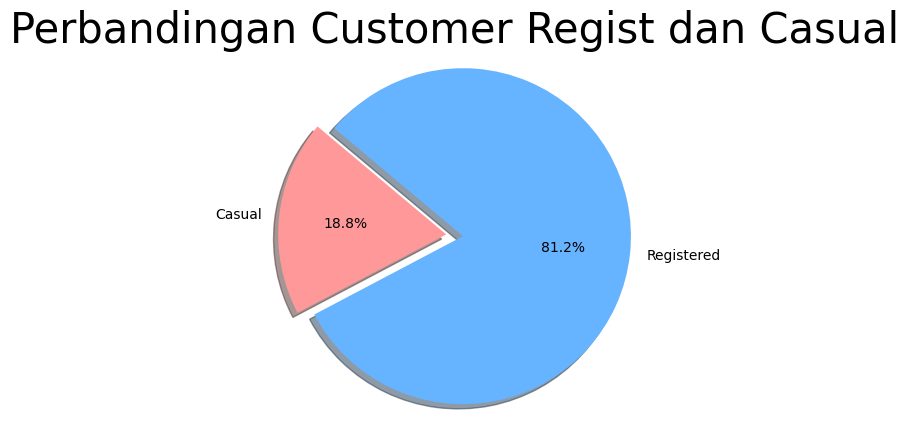

In [128]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = days_df['casual'].sum()

# Menjumlahkan semua elemen dalam kolom registered
total_registered = days_df['registered'].sum()

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']
colors = ["#FF9999", "#66B3FF"]
explode = (0.1, 0)

plt.pie(data, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=140, colors=colors)

# Menampilkan pie plot
plt.axis('equal')
plt.title('Perbandingan Customer Regist dan Casual', fontsize=30)
plt.show()


**dari jumlah penyewa yang ada, ditemukan perbandingan bahwa 81,2% merupakan penyewa yang registered dan 18,8% adalah penyewa yang casual**

### Pertanyaan 2: Jam sibuk untuk peminjaman sepeda dan Jam yang peminjam nya sedikit

<ipython-input-139-2f27eef9bdd4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

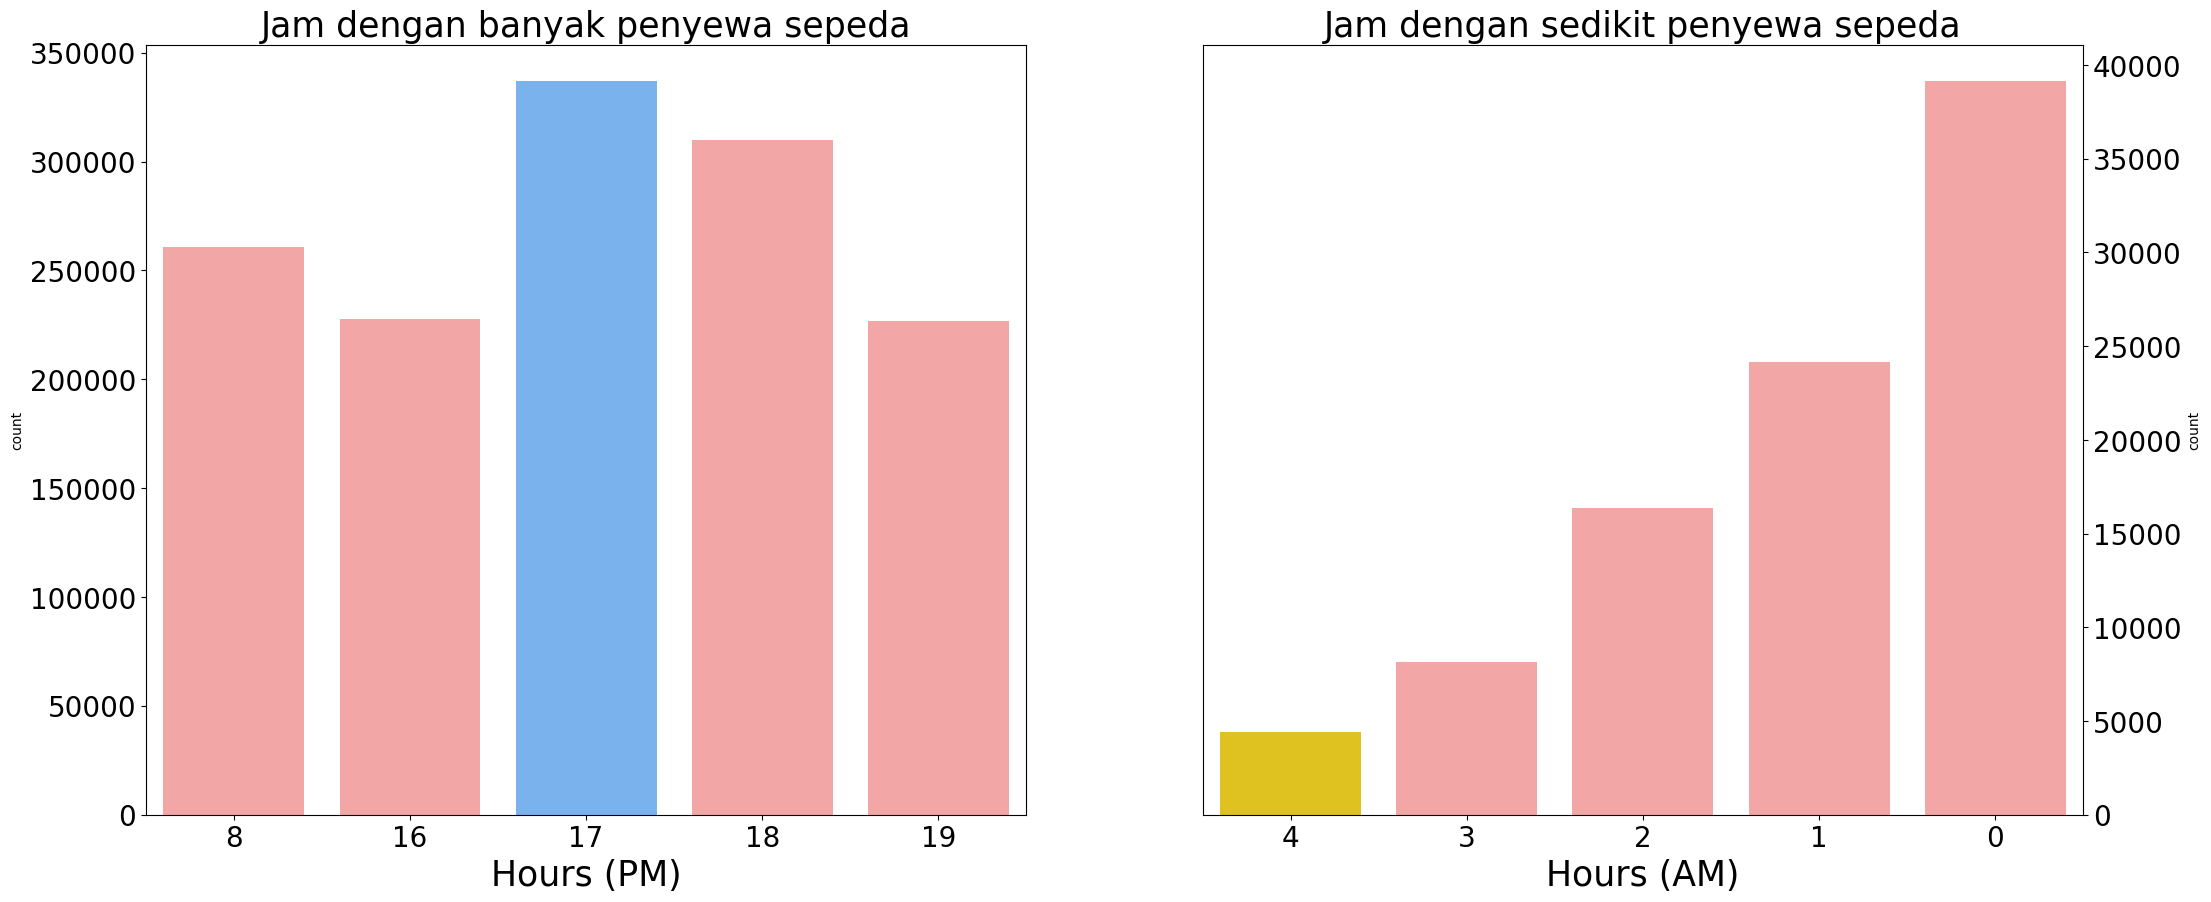

In [139]:
sum_order_items_df = hours_df.groupby("hours")["count"].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

# Barplot untuk penyewa sepeda terbanyak
sns.barplot(
    x="hours",
    y="count",
    data=sum_order_items_df.head(5),
    palette=["#FF9999", "#FF9999", "#66B2FF", "#FF9999", "#FF9999"],
    ax=ax[0]
)

# Mengatur label dan judul untuk subplot pertama
ax[0].set_xlabel("Hours (PM)", fontsize=25)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=25)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20)

# Barplot untuk penyewa sepeda terdikit
sns.barplot(
    x="hours",
    y="count",
    data=sum_order_items_df.sort_values(by="hours").head(5),
    palette=["#FF9999", "#FF9999", "#FF9999", "#FF9999", "#FFD700"],
    ax=ax[1]
)

# Mengatur label dan judul untuk subplot kedua
ax[1].set_xlabel("Hours (AM)", fontsize=25)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=25)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)

# Menampilkan plot
plt.show()


**dari data yang ada, pada jam 17 merupakan jam penyewa terbanyak dan pada jam 4 merupakan jam dengan penyewa paling sedikit**

### Pertanyaan 3: Musim dengan penyewa sepeda paling banyak

<ipython-input-140-2a1838f3430b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = days_df.groupby('season')['count'].sum()


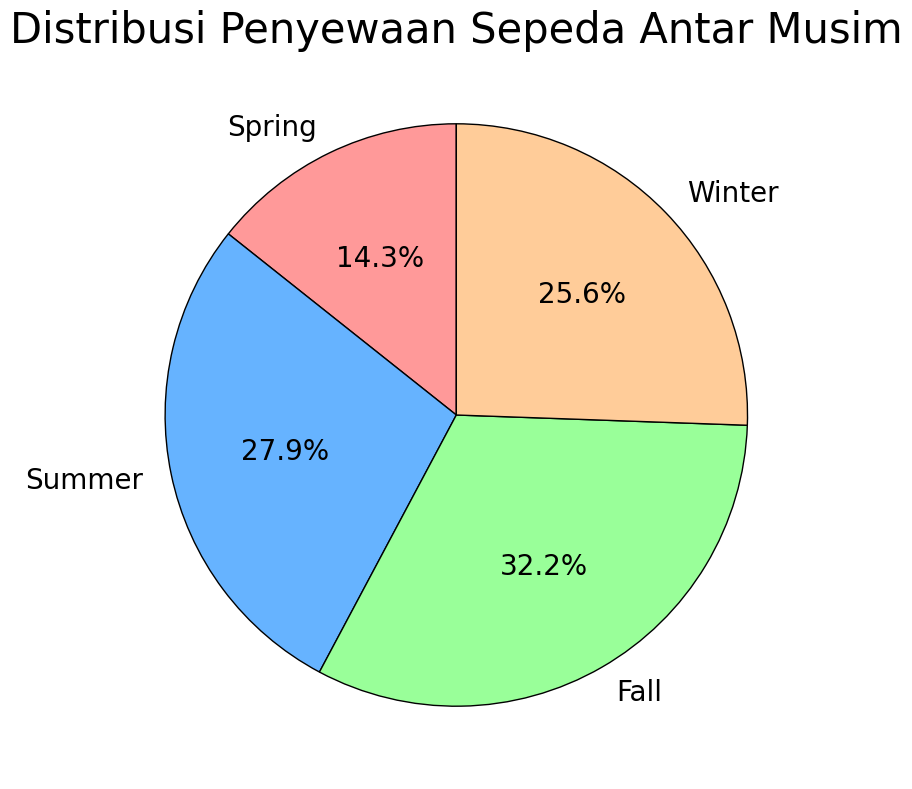

In [140]:
colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]

# Menghitung total penyewaan per season
season_counts = days_df.groupby('season')['count'].sum()

fig, ax = plt.subplots(figsize=(15, 8))

ax.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90,
       colors=colors, textprops={'fontsize': 20}, wedgeprops={'edgecolor': 'black'})

ax.set_title("Distribusi Penyewaan Sepeda Antar Musim", fontsize=30, loc="center")

# Menampilkan plot
plt.tight_layout()
plt.show()


**Musim Fall merupakan musim dengan penyewa terbanyak, disusul oleh musim Summer lalu musim Winter**

**Insight:**
- dari jumlah penyewa yang ada, ditemukan perbandingan bahwa 81,2% merupakan penyewa yang registered dan 18,8% adalah penyewa yang casual

- dari data yang ada, pada jam 17 merupakan jam penyewa terbanyak dan pada jam 4 merupakan jam dengan penyewa paling sedikit

- Musim Fall merupakan musim dengan penyewa terbanyak, disusul oleh musim Summer lalu musim Winter

## Analisis Lanjutan RFM

In [146]:
# Menghitung jumlah nilai unik untuk setiap kategori dalam category_days

unique_counts = hours_df.groupby(by="category_days").agg({'count': 'nunique'}).sort_values(by='count', ascending=False)

print(unique_counts)


               count
category_days       
weekdays         856
weekend          674


**Jika terlihat dari data, Konsumen cenderung menyewa sepeda pada saat weekdays**

## Conclusion

**Pertanyaan Pertama Perbandingan Penyewa Registered dan Casual**

Dari total jumlah penyewa yang ada, teridentifikasi bahwa 81,2% merupakan penyewa yang terdaftar (registered), sedangkan 18,8% adalah penyewa biasa (casual). Hal ini menunjukkan dominasi penyewa terdaftar dalam penggunaan layanan penyewaan sepeda, yang dapat menjadi indikasi loyalitas pelanggan atau efektivitas strategi pemasaran yang ditujukan untuk mendorong pendaftaran.

**Pertanyaan Kedua Jam Penyewaan Sepeda**

Analisis waktu penyewaan sepeda menunjukkan bahwa jam 17 adalah waktu dengan jumlah penyewa terbanyak, sedangkan jam 4 adalah waktu dengan penyewa paling sedikit. Temuan ini dapat membantu dalam merencanakan ketersediaan sepeda dan sumber daya pada jam-jam tertentu untuk memenuhi permintaan pelanggan yang lebih tinggi.

**Pertanyaan Ketiga Musim Penyewa**

Sepeda pada Musim Fall (musim gugur) tercatat sebagai musim dengan jumlah penyewa terbanyak, diikuti oleh musim Summer (musim panas) dan musim Winter (musim dingin). Hal ini menunjukkan bahwa penyewaan sepeda lebih diminati pada musim-musim tertentu, yang dapat memberikan informasi penting bagi pengelola bisnis dalam menyesuaikan strategi pemasaran dan penyediaan sepeda berdasarkan musim.

**Berdasarkan analisis lanjutan, Konsumen cenderung menyewa sepeda pada saat weekdays**